In [72]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [73]:
df=pd.read_csv('uber.csv')
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [74]:
df=df.drop(['Unnamed: 0','key'],axis=1)

In [75]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [76]:
df.isna().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [77]:
df['dropoff_latitude'].fillna(value=df['dropoff_latitude'].mean(), inplace=True)
df['dropoff_longitude'].fillna(value=df['dropoff_longitude'].median(), inplace=True)
df.isna().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [78]:
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])

In [79]:
df=df.assign(hour=df['pickup_datetime'].dt.hour,
            day=df['pickup_datetime'].dt.day,
            month=df['pickup_datetime'].dt.month,
            year=df['pickup_datetime'].dt.year,
            dayofweek=df['pickup_datetime'].dt.dayofweek)

In [80]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,3


In [81]:
def removeoutliers(df1, col):
    Q1=df1[col].quantile(0.25)
    Q3=df1[col].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    df1[col]=np.clip(df[col],lower_bound,upper_bound)
    return df1
def treatoutliers(df,col_list):
    for col in col_list:
        df=removeoutliers(df,col)
    return df
numeric_cols=df.select_dtypes(include=[np.number]).columns.tolist()
df=treatoutliers(df,numeric_cols)

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   fare_amount        200000 non-null  float64            
 1   pickup_datetime    200000 non-null  datetime64[ns, UTC]
 2   pickup_longitude   200000 non-null  float64            
 3   pickup_latitude    200000 non-null  float64            
 4   dropoff_longitude  200000 non-null  float64            
 5   dropoff_latitude   200000 non-null  float64            
 6   passenger_count    200000 non-null  float64            
 7   hour               200000 non-null  int32              
 8   day                200000 non-null  int32              
 9   month              200000 non-null  int32              
 10  year               200000 non-null  int32              
 11  dayofweek          200000 non-null  int32              
dtypes: datetime64[ns, UTC](1), flo

In [83]:
df=df.loc[
(df.pickup_latitude < 90) |(df.pickup_latitude > -90) |
(df.dropoff_latitude < 90) |(df.dropoff_latitude > -90) |
(df.pickup_longitude < 180) |(df.pickup_longitude > -180) |
(df.dropoff_longitude < 180) |(df.dropoff_longitude > -180)
]

In [84]:
import haversine as hs
for pos in range(len(df['pickup_longitude'])):
    lat1,lon1,lat2,lon2=df['pickup_latitude'][pos],df['pickup_longitude'][pos],df['dropoff_latitude'][pos],df['dropoff_longitude'][pos]
    loc1=(lat1,lon1)
    loc2=(lat2,lon2)
    dis=hs.haversine(loc1,loc2)
    df['dist_travel_km']=dis
df.head()
    

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel_km
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1.0,19,7,5,2015,3,5.417791
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1.0,20,17,7,2009,4,5.417791
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1.0,21,24,8,2009,0,5.417791
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3.0,8,26,6,2009,4,5.417791
4,16.0,2014-08-28 17:47:00+00:00,-73.929786,40.744085,-73.973082,40.761247,3.5,17,28,8,2014,3,5.417791


In [85]:
df=df[(df['dist_travel_km']>=1)&(df['dist_travel_km']<=130)]

In [86]:
df.corr()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel_km
fare_amount,1.000000,0.146982,0.154069,-0.110842,0.218675,-0.125898,0.015778,-0.023623,0.004534,0.030817,0.141277,0.013652,NaN
pickup_datetime,0.146982,1.000000,0.010404,-0.014087,0.011714,-0.009879,-0.008159,0.002024,-0.002073,0.038523,0.987982,0.004834,NaN
pickup_longitude,0.154069,0.010404,1.000000,0.259497,0.425619,0.073290,-0.013213,0.011579,-0.003204,0.001169,0.010198,-0.024652,NaN
pickup_latitude,-0.110842,-0.014087,0.259497,1.000000,0.048889,0.515714,-0.012889,0.029681,-0.001553,0.001562,-0.014243,-0.042310,NaN
dropoff_longitude,0.218675,0.011714,0.425619,0.048889,1.000000,0.245667,-0.009303,-0.046558,-0.004007,0.002391,0.011346,-0.003336,NaN
dropoff_latitude,-0.125898,-0.009879,0.073290,0.515714,0.245667,1.000000,-0.006308,0.019783,-0.003479,-0.001193,-0.009603,-0.031919,NaN
passenger_count,0.015778,-0.008159,-0.013213,-0.012889,-0.009303,-0.006308,1.000000,0.020274,0.002712,0.010351,-0.009749,0.048550,NaN
hour,-0.023623,0.002024,0.011579,0.029681,-0.046558,0.019783,0.020274,1.000000,0.004677,-0.003926,0.002156,-0.086947,NaN
day,0.004534,-0.002073,-0.003204,-0.001553,-0.004007,-0.003479,0.002712,0.004677,1.000000,-0.017360,-0.012170,0.005617,NaN
month,0.030817,0.038523,0.001169,0.001562,0.002391,-0.001193,0.010351,-0.003926,-0.017360,1.000000,-0.115859,-0.008786,NaN


<Axes: >

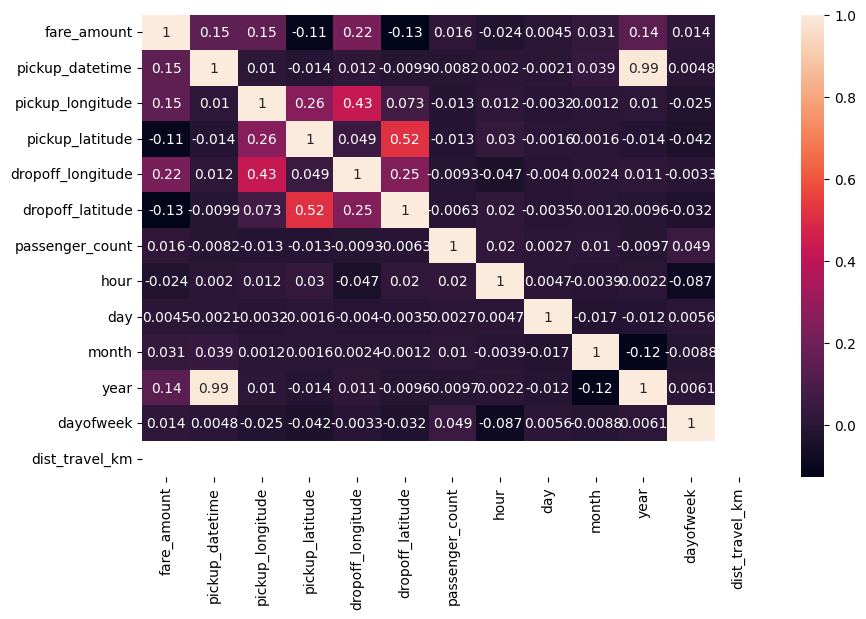

In [90]:
plt.subplots(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   fare_amount        200000 non-null  float64            
 1   pickup_datetime    200000 non-null  datetime64[ns, UTC]
 2   pickup_longitude   200000 non-null  float64            
 3   pickup_latitude    200000 non-null  float64            
 4   dropoff_longitude  200000 non-null  float64            
 5   dropoff_latitude   200000 non-null  float64            
 6   passenger_count    200000 non-null  float64            
 7   hour               200000 non-null  int32              
 8   day                200000 non-null  int32              
 9   month              200000 non-null  int32              
 10  year               200000 non-null  int32              
 11  dayofweek          200000 non-null  int32              
 12  dist_travel_km     200000 non-null 

In [94]:
X=df[['passenger_count','hour','day','month','year','dayofweek','dist_travel_km']]
Y=df['fare_amount']

In [96]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33)

In [98]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(X_train,Y_train)

LinearRegression()

In [100]:
regression.intercept_

-855.2906674820026

In [101]:
prediction=regression.predict(X_test)

In [102]:
from sklearn.metrics import r2_score
r2_score(Y_test,prediction)

0.023352562347643047

In [104]:
from sklearn.metrics import mean_squared_error
MSE=mean_squared_error(Y_test,prediction)

In [105]:
RMES=np.sqrt(MSE)
RMES

5.38743060711188

In [106]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100)

In [109]:
rf.fit(X_train,Y_train)

RandomForestRegressor()

In [115]:
pred=rf.predict(X_test)

In [116]:
R2_Random = r2_score(Y_test,prediction)
R2_Random

-0.22648132945433175

In [117]:
MSE_Random = mean_squared_error(Y_test,prediction)

In [118]:
MSE

29.024408546445883